In [1]:
import pandas as pd
df = pd.read_csv('../coronanet/data/LMA_relative_time_cases.csv')

In [2]:
df.drop(columns='Unnamed: 0', inplace=True)
df.Date = pd.to_datetime(df.Date)

In [3]:
df.Date = pd.to_datetime(df.Date)

In [4]:
df.head(3)

,Date,ID,Policy,Cases,Cases_New,Type,Source,J14,J-14,J7,J21
0,2020-01-26,CN,C1,56,14.0,Deaths,JHU,905,-10000,361,1766
1,2020-01-26,CN,C2,56,14.0,Deaths,JHU,905,-10000,361,1766
2,2020-01-22,CN,C3,17,17.0,Deaths,JHU,563,-10000,133,1117


In [6]:
df2.dtypes

Date         datetime64[ns]
ID                   object
Policy               object
Cases                 int64
Cases_New           float64
Type                 object
Source               object
J14                   int64
J-14                  int64
J7                    int64
J21                   int64
dtype: object

<AxesSubplot:>

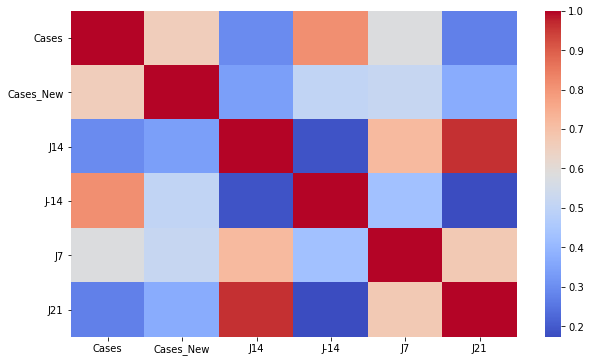

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(pd.DataFrame(df.corr()), cmap='coolwarm')

In [ ]:
sns.pairplot(df2)

In [ ]:
#HTML super profils
import pandas_profiling
profile = df.profile_report()
# profile.to_file(output_file='name.html')

## Group By Policy

In [40]:
df2 = df.copy()

In [41]:
df2 = df2[df2['J14'] != -10000]
df2 = df2[df2['J7'] != -10000]
df2 = df2[df2['J-14'] != -10000]
df2 = df2[df2['J21'] != -10000]
df2.shape

(2766, 11)

In [42]:
df2['delta J-14 J0'] = df2['Cases']- df2['J-14']
df2['delta half J-14'] = (df2['Cases']- df2['J-14'])/2
df2['delta J0 J7'] = df2['J7'] - df2['Cases']
df2['delta J7 J14'] = df2['J14'] - df2['J7']
df2['delta J14 J21'] = df2['J21'] - df2['J14']
df2

,Date,ID,Policy,Cases,Cases_New,Type,Source,J14,J-14,J7,J21,delta J-14 J0,delta half J-14,delta J0 J7,delta J7 J14,delta J14 J21
7,2020-02-25,CN,C8,2665,70.0,Deaths,JHU,3139,1112,2947,3230,1553,776.5,282,192,91
8,2020-04-11,CN,E1,3343,3.0,Deaths,JHU,4636,3299,4636,4637,44,22.0,1293,0,1
9,2020-04-11,CN,I2D,3343,3.0,Deaths,JHU,4636,3299,4636,4637,44,22.0,1293,0,1
10,2020-05-21,CN,E2,4638,0.0,Deaths,JHU,4638,4637,4638,4638,1,0.5,0,0,0
12,2020-03-08,CN,E4,3100,28.0,Deaths,JHU,3274,2445,3203,3304,655,327.5,103,71,30
13,2020-02-23,CN,H4,2445,2.0,Deaths,JHU,3100,905,2872,3203,1540,770.0,427,228,103
14,2020-03-05,IN,C1,0,0.0,Deaths,JHU,4,0,1,20,0,0.0,1,3,16
15,2020-03-05,IN,C3,0,0.0,Deaths,JHU,4,0,1,20,0,0.0,1,3,16
16,2020-03-16,IN,C2,2,0.0,Deaths,JHU,32,0,10,136,2,1.0,8,22,104
17,2020-03-16,IN,C7,2,0.0,Deaths,JHU,32,0,10,136,2,1.0,8,22,104


In [60]:
policy_gb = df2.groupby('Policy').sum()

In [61]:
policy_gb.drop(columns=['J14','J-14','J7','J21','Cases','Cases_New'], inplace=True)

In [62]:
policy_gb.drop(columns=['delta J-14 J0'], inplace=True)

In [63]:
test = policy_gb.T

In [64]:
test

Policy,C1,C2,C3,C4,C5,C6,C7,C8,E1,E2,...,H3,H4,H5,H6,I1D,I2D,I3D,I4D,I4L,I4LD
delta half J-14,174.0,482.5,98.5,1524.0,2877.5,1175.0,812.5,3472.0,10314.5,9490.0,...,1100.0,5652.5,13567.0,25247.5,1.5,7837.5,1.5,3.0,3.0,3.0
delta J0 J7,1850.0,4656.0,1385.0,4561.0,10259.0,5499.0,4942.0,4641.0,25478.0,23741.0,...,1863.0,16233.0,15886.0,21352.0,27.0,21851.0,25.0,58.0,58.0,58.0
delta J7 J14,8163.0,16984.0,6292.0,12134.0,25681.0,16258.0,16336.0,9089.0,41821.0,40032.0,...,2460.0,22271.0,18805.0,20867.0,110.0,37938.0,105.0,325.0,325.0,325.0
delta J14 J21,21200.0,39723.0,18048.0,26570.0,42963.0,34466.0,35791.0,18276.0,51938.0,48765.0,...,3223.0,29870.0,22702.0,22868.0,444.0,48145.0,433.0,1247.0,1247.0,1247.0


No handles with labels found to put in legend.


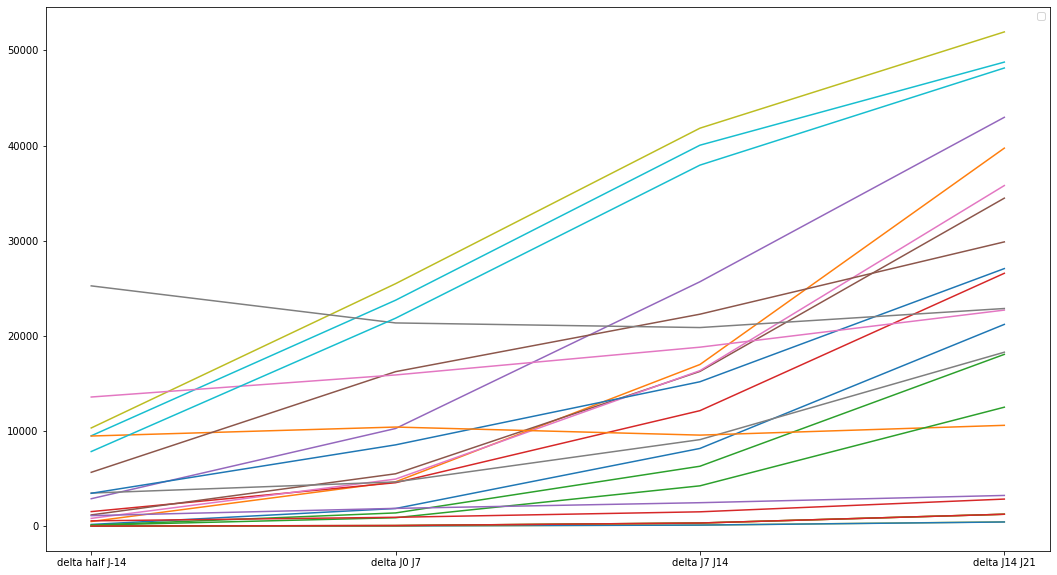

In [74]:
plt.figure(figsize=(18,10))

import matplotlib.pyplot as plt
plt.plot(test)
plt.legend()

## Group By Country

In [108]:
dfc = df.copy()

In [109]:
dfc = dfc[dfc['J14'] != -10000]
dfc = dfc[dfc['J7'] != -10000]
dfc = dfc[dfc['J-14'] != -10000]
dfc = dfc[dfc['J21'] != -10000]
dfc.shape

(2766, 11)

In [110]:
dfc['delta J-14 J0'] = dfc['Cases']- dfc['J-14']
dfc['delta half J-14'] = (dfc['Cases']- dfc['J-14'])/2
dfc['delta J0 J7'] = dfc['J7'] - dfc['Cases']
dfc['delta J7 J14'] = dfc['J14'] - dfc['J7']
dfc['delta J14 J21'] = dfc['J21'] - dfc['J14']
dfc

,Date,ID,Policy,Cases,Cases_New,Type,Source,J14,J-14,J7,J21,delta J-14 J0,delta half J-14,delta J0 J7,delta J7 J14,delta J14 J21
7,2020-02-25,CN,C8,2665,70.0,Deaths,JHU,3139,1112,2947,3230,1553,776.5,282,192,91
8,2020-04-11,CN,E1,3343,3.0,Deaths,JHU,4636,3299,4636,4637,44,22.0,1293,0,1
9,2020-04-11,CN,I2D,3343,3.0,Deaths,JHU,4636,3299,4636,4637,44,22.0,1293,0,1
10,2020-05-21,CN,E2,4638,0.0,Deaths,JHU,4638,4637,4638,4638,1,0.5,0,0,0
12,2020-03-08,CN,E4,3100,28.0,Deaths,JHU,3274,2445,3203,3304,655,327.5,103,71,30
13,2020-02-23,CN,H4,2445,2.0,Deaths,JHU,3100,905,2872,3203,1540,770.0,427,228,103
14,2020-03-05,IN,C1,0,0.0,Deaths,JHU,4,0,1,20,0,0.0,1,3,16
15,2020-03-05,IN,C3,0,0.0,Deaths,JHU,4,0,1,20,0,0.0,1,3,16
16,2020-03-16,IN,C2,2,0.0,Deaths,JHU,32,0,10,136,2,1.0,8,22,104
17,2020-03-16,IN,C7,2,0.0,Deaths,JHU,32,0,10,136,2,1.0,8,22,104


In [111]:
country_gb = dfc.groupby('ID').sum()

In [112]:
country_gb

,Cases,Cases_New,J14,J-14,J7,J21,delta J-14 J0,delta half J-14,delta J0 J7,delta J7 J14,delta J14 J21
ID,,,,,,,,,,,
AD,236,5.0,378,183,304,554,53,26.5,68,74,176
AE,1353,12.0,1531,1248,1419,1735,105,52.5,66,112,204
AF,1605,19.0,1973,1393,1768,2225,212,106.0,163,205,252
AL,48,2.0,161,33,81,285,15,7.5,33,80,124
AO,267,4.0,324,213,303,340,54,27.0,36,21,16
AR,2911,78.0,4861,1927,3742,6571,984,492.0,831,1119,1710
AT,2671,78.0,4915,1969,3405,7211,702,351.0,734,1510,2296
AU,289,4.0,652,225,418,932,64,32.0,129,234,280
AZ,106,7.0,224,49,157,307,57,28.5,51,67,83


In [116]:
country_gb = country_gb.sort_values(by=['Cases'])

In [117]:
country_gb.drop(columns=['J14','J-14','J7','J21','Cases','Cases_New'], inplace=True)

In [118]:
country_gb.drop(columns=['delta J-14 J0'], inplace=True)

In [119]:
test_temp = country_gb.T

In [120]:
test = test_temp.head()

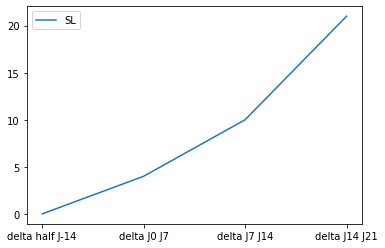

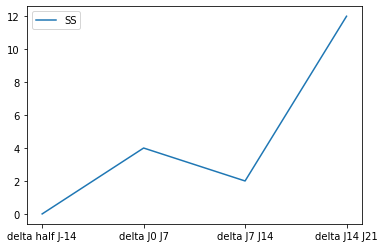

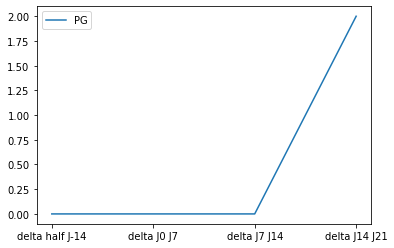

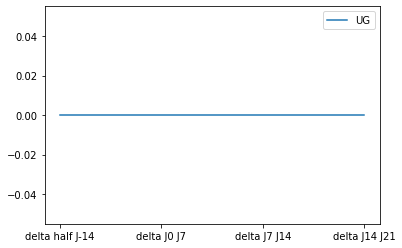

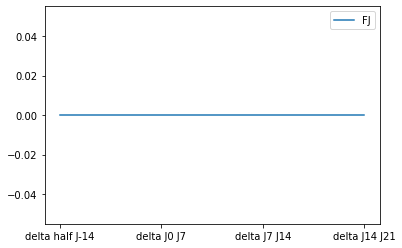

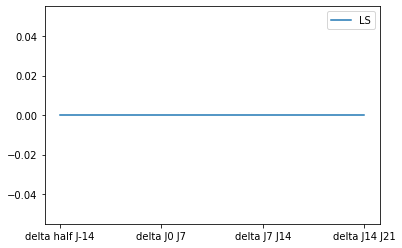

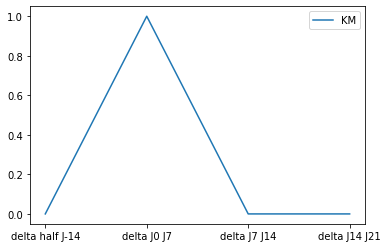

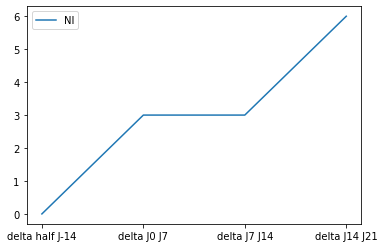

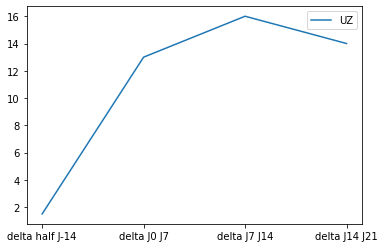

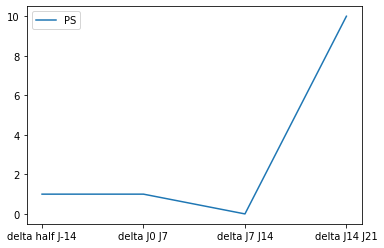

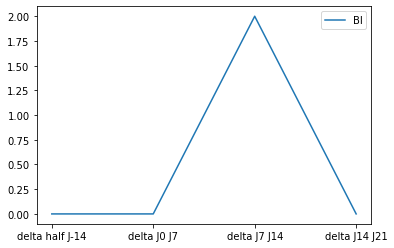

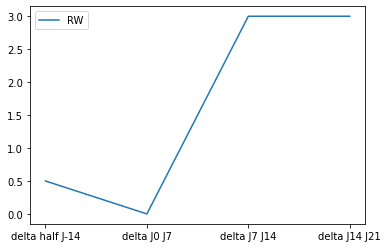

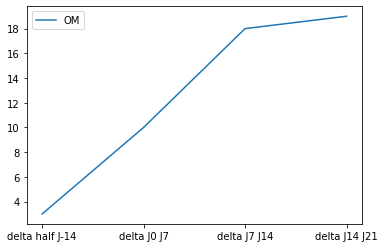

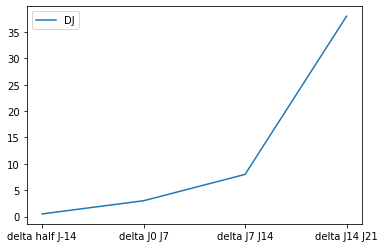

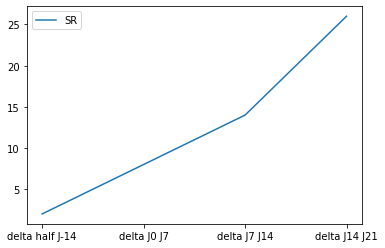

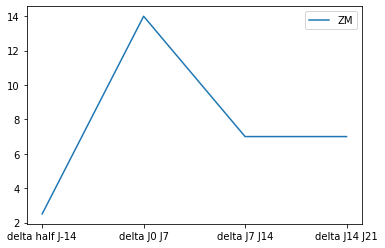

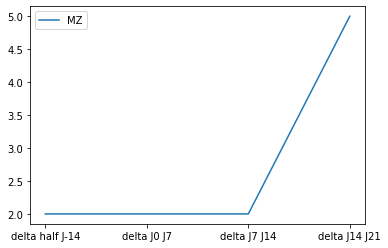

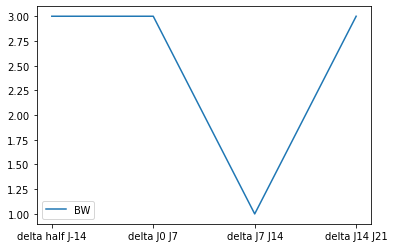

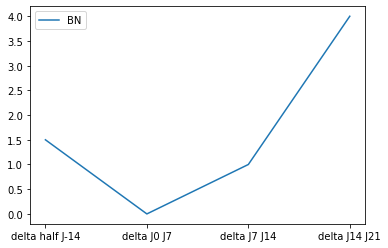

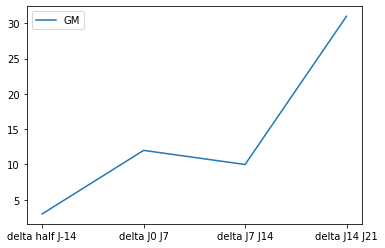

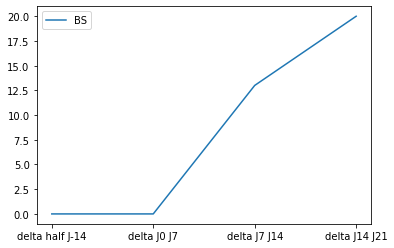

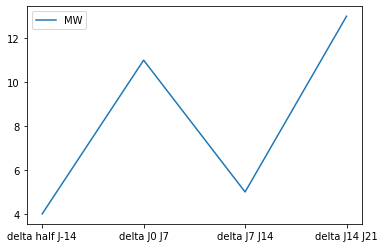

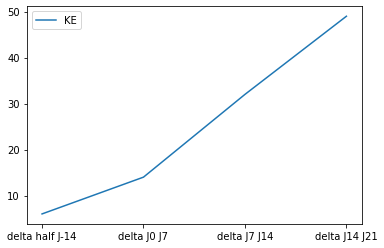

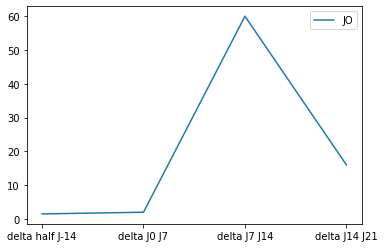

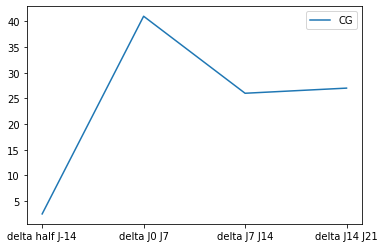

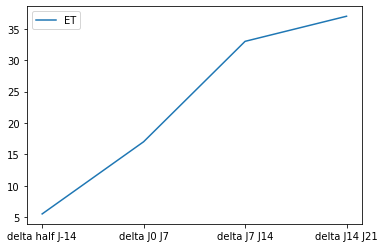

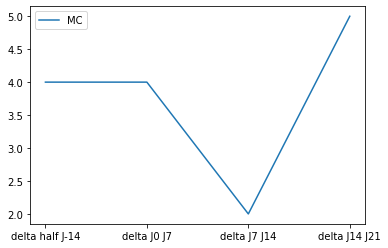

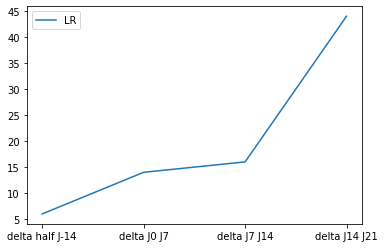

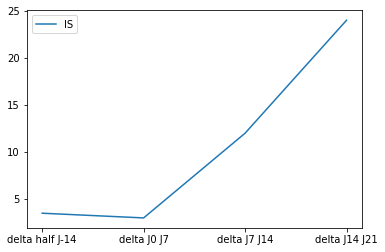

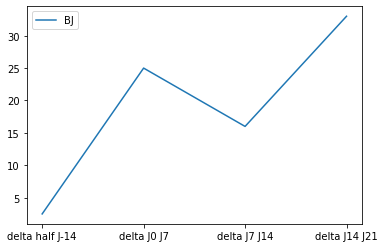

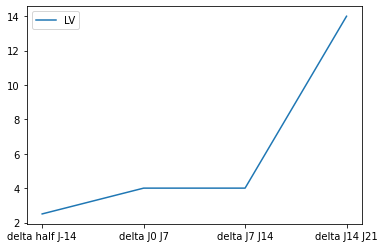

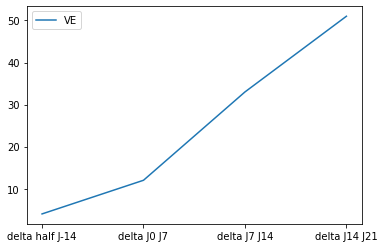

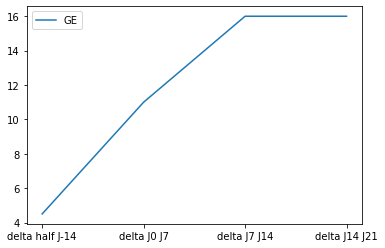

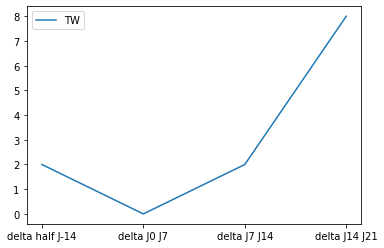

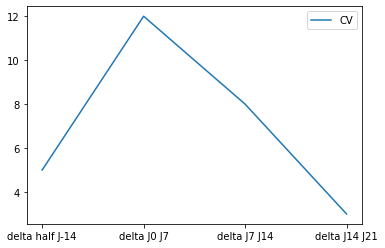

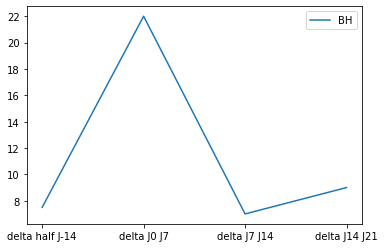

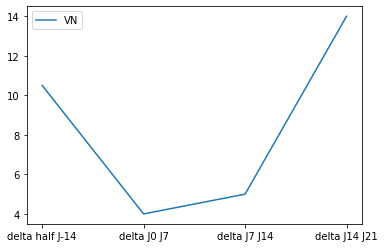

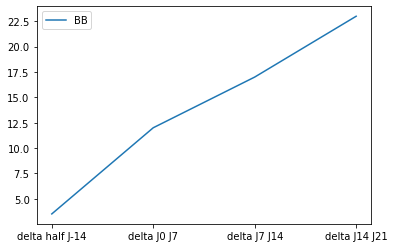

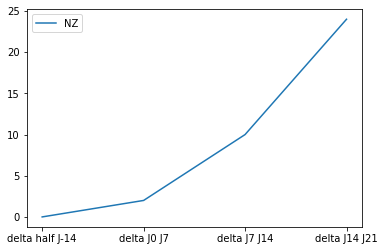

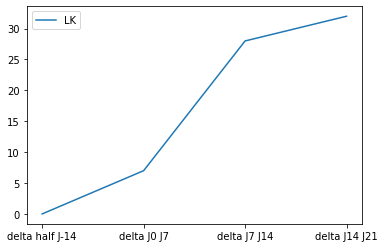

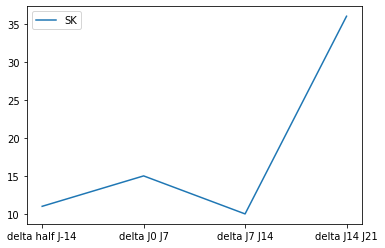

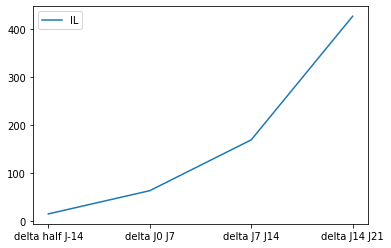

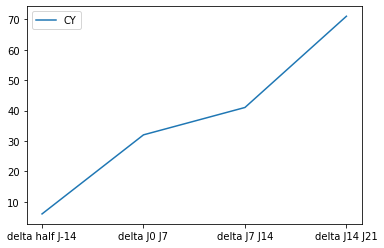

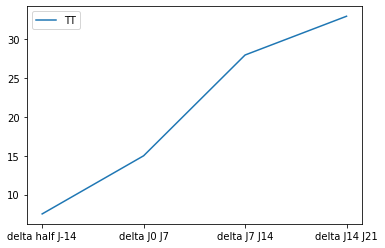

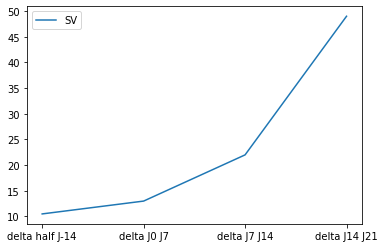

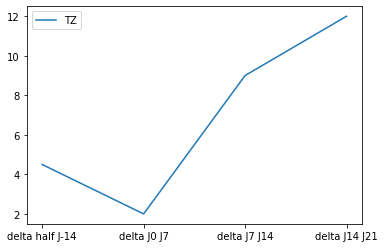

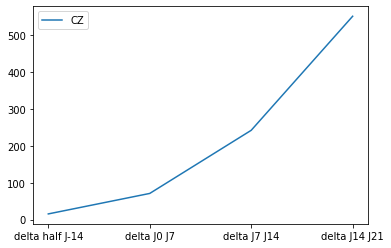

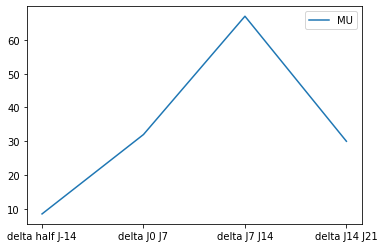

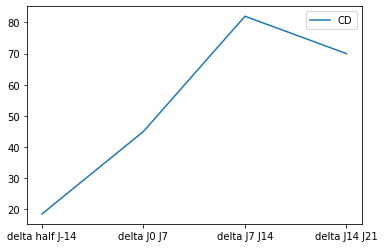

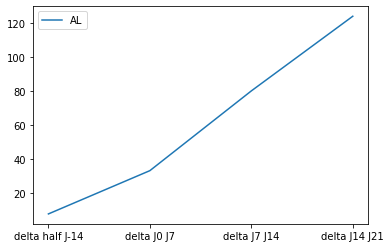

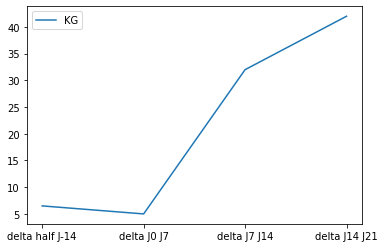

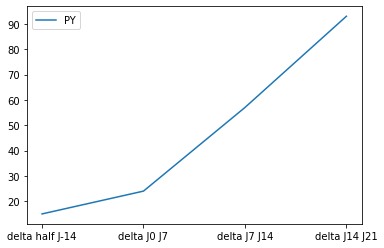

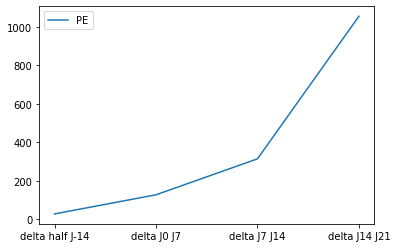

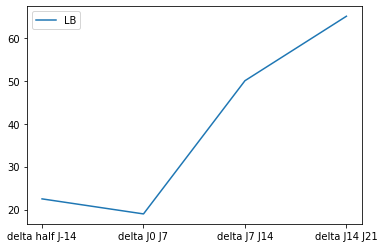

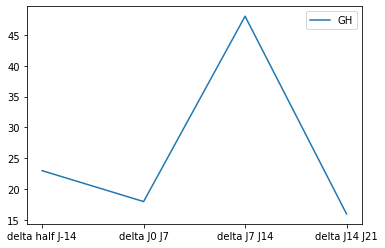

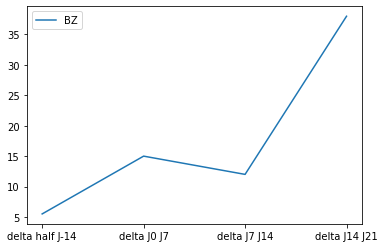

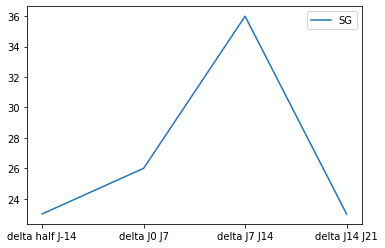

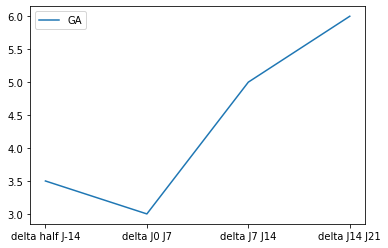

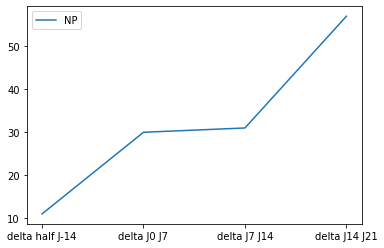

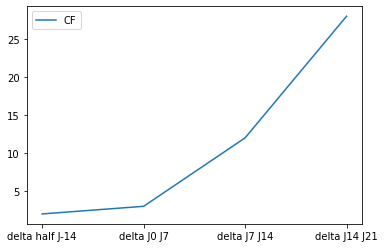

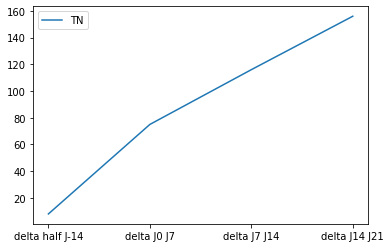

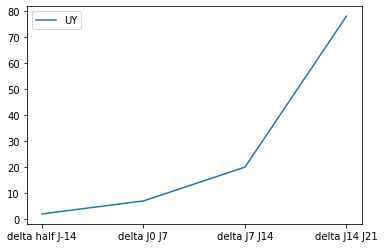

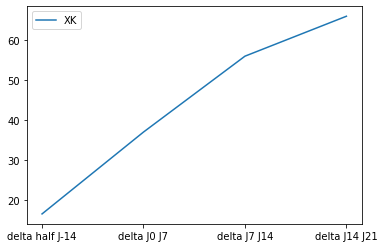

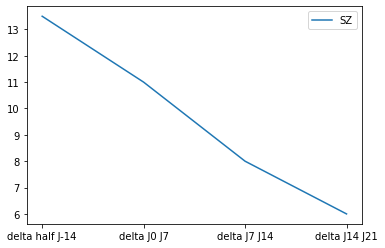

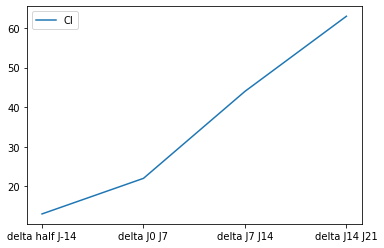

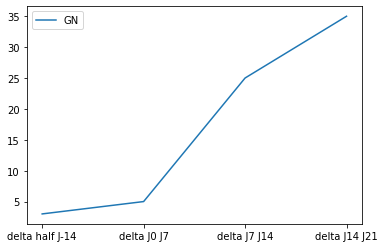

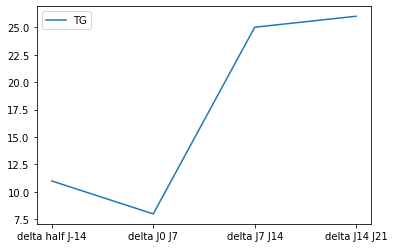

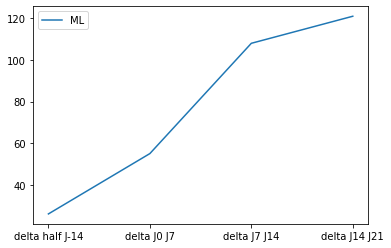

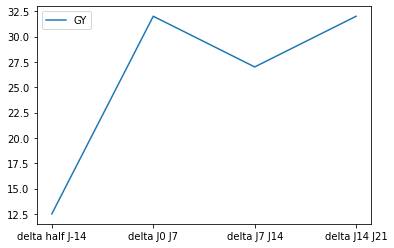

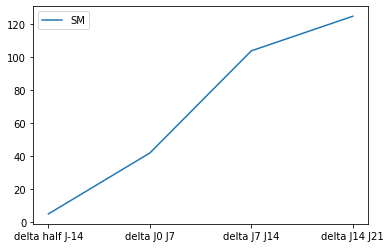

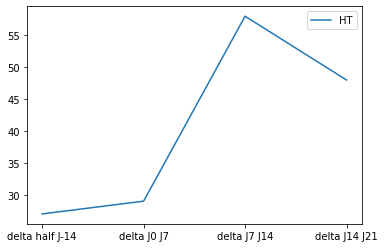

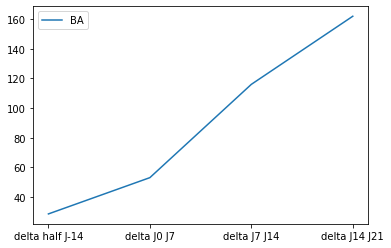

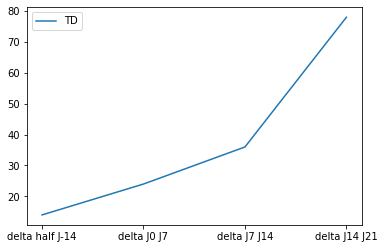

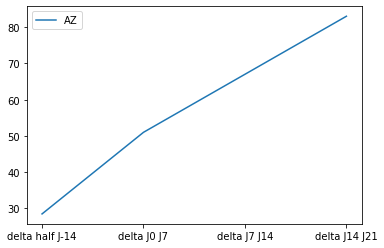

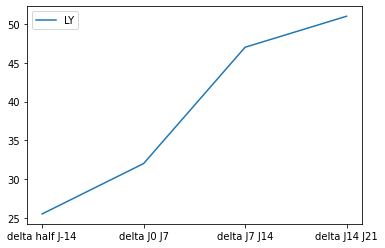

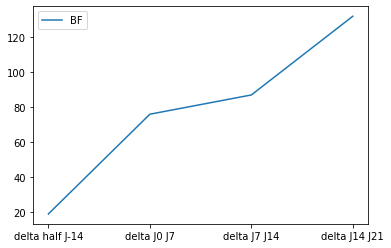

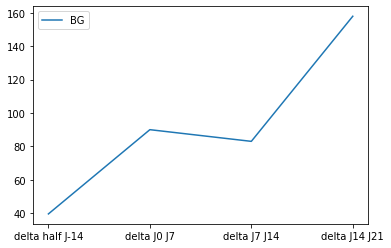

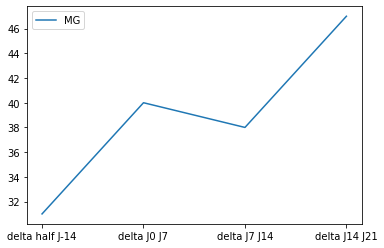

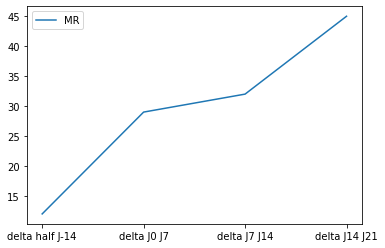

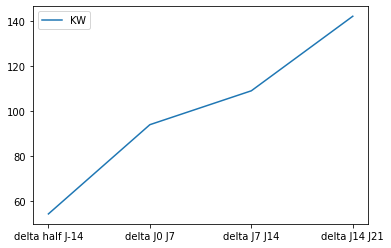

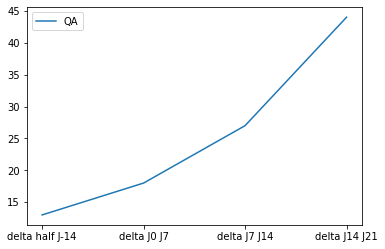

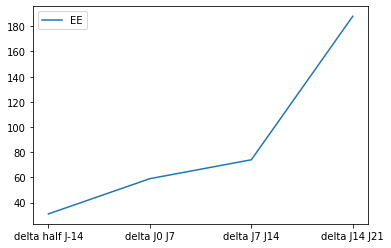

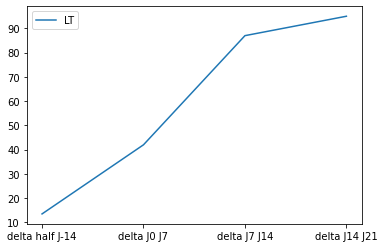

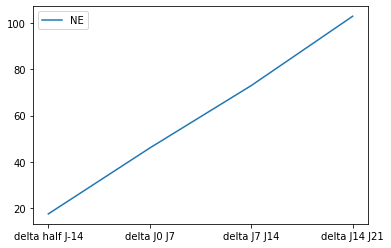

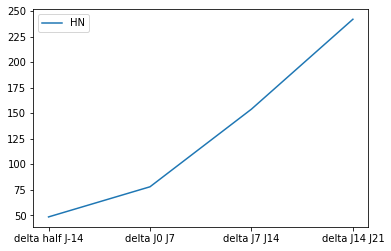

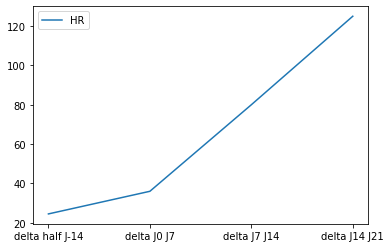

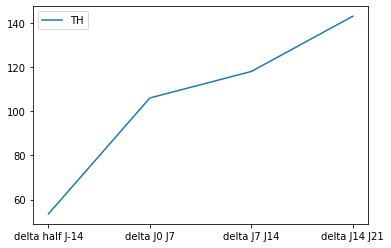

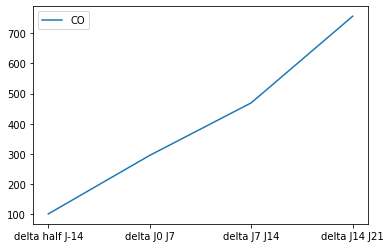

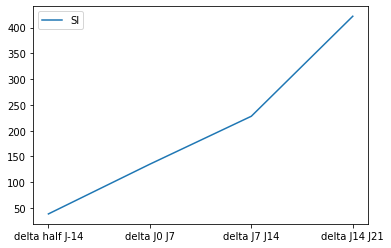

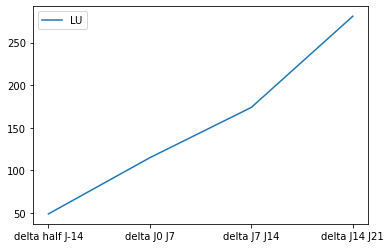

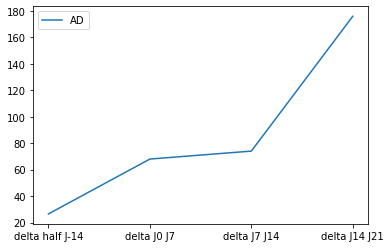

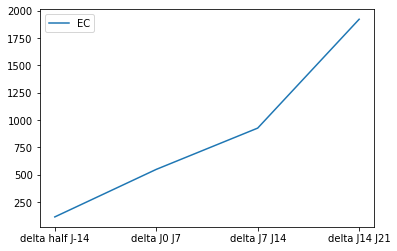

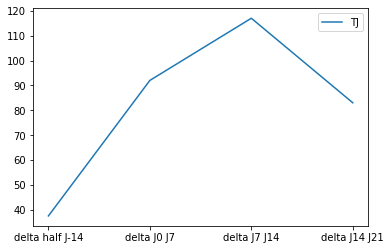

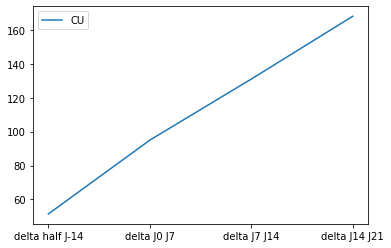

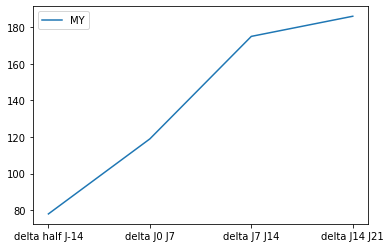

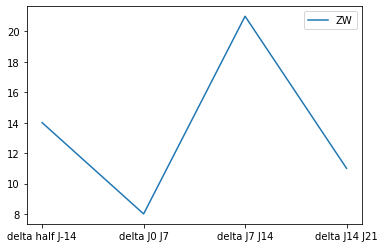

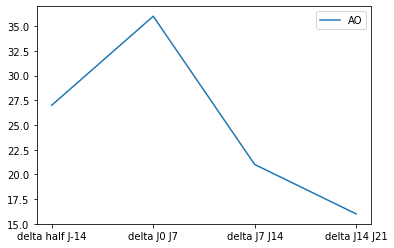

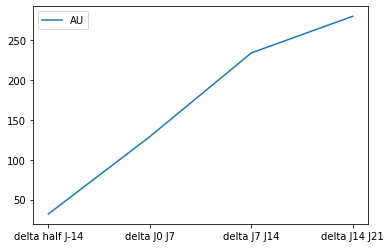

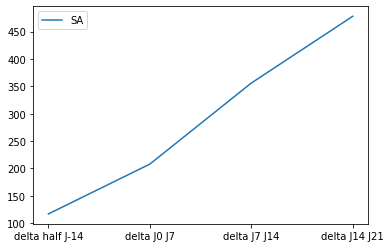

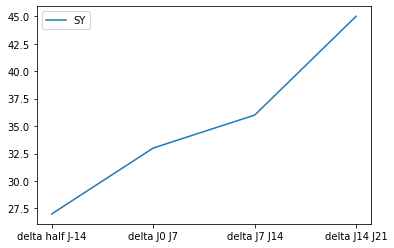

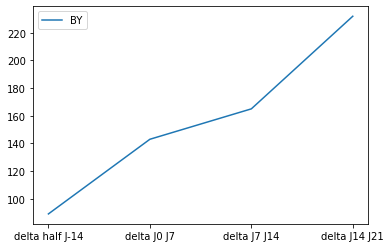

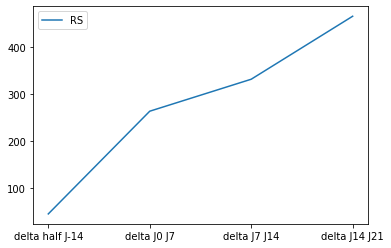

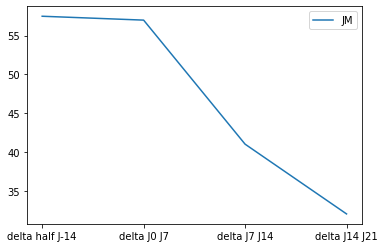

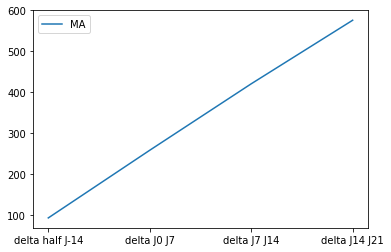

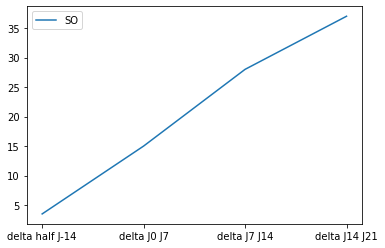

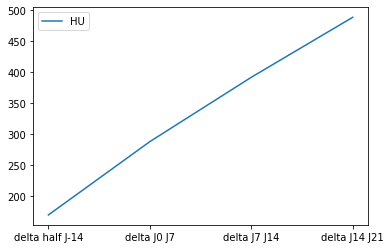

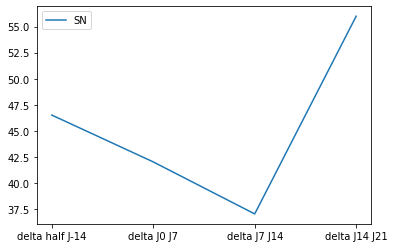

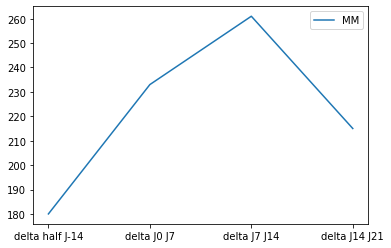

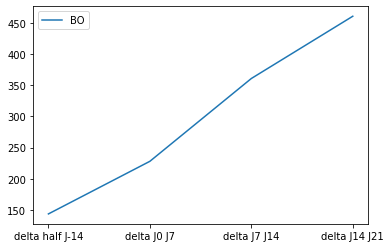

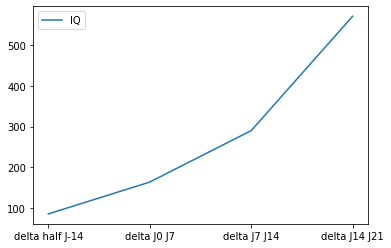

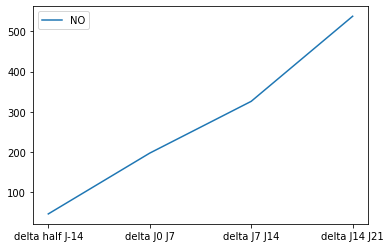

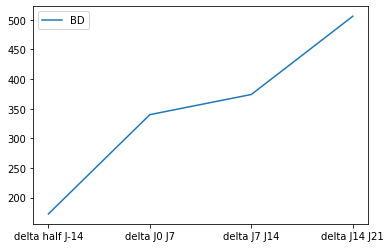

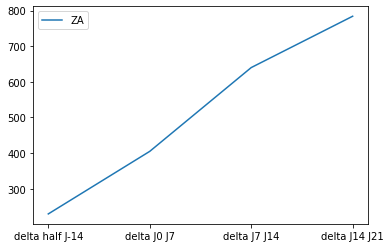

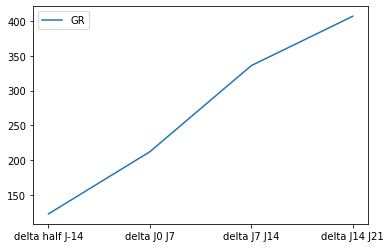

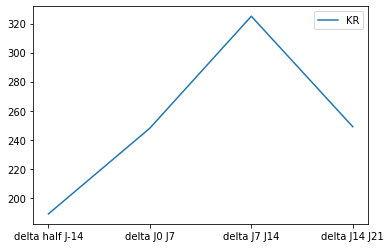

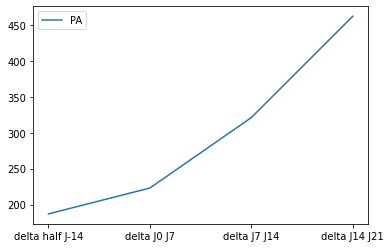

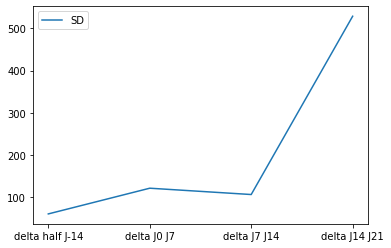

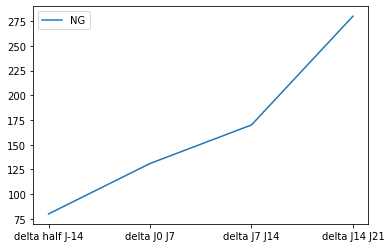

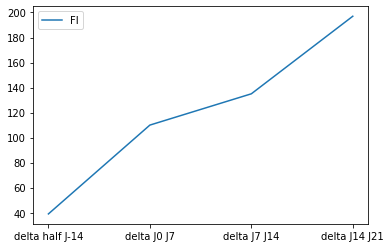

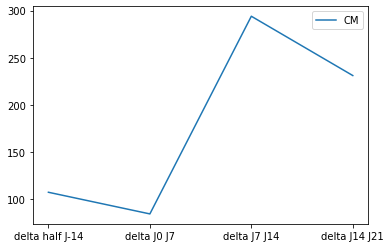

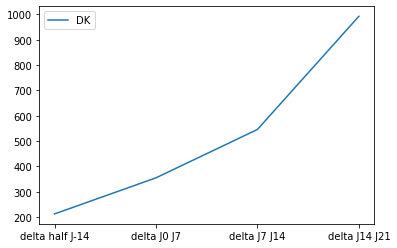

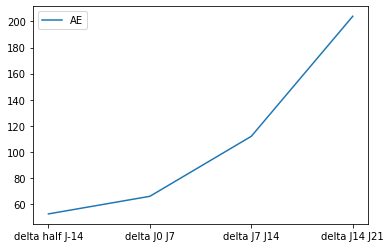

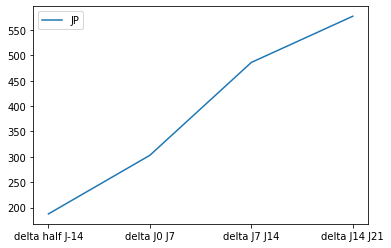

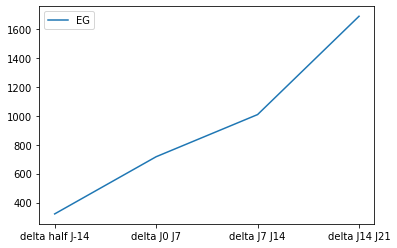

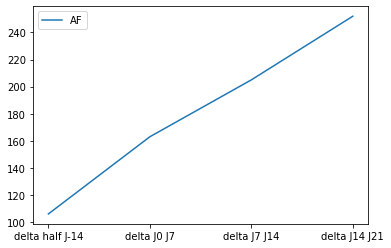

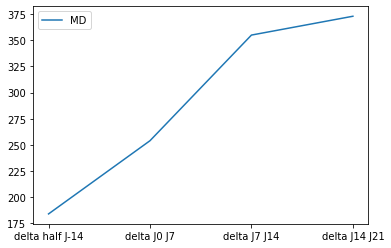

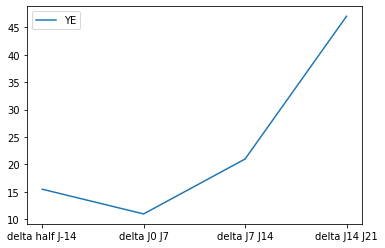

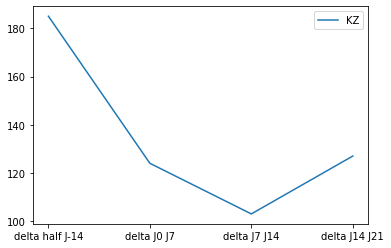

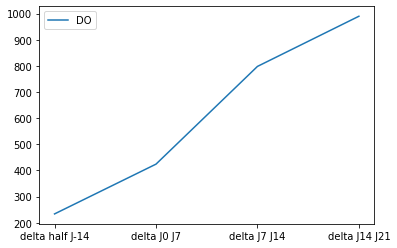

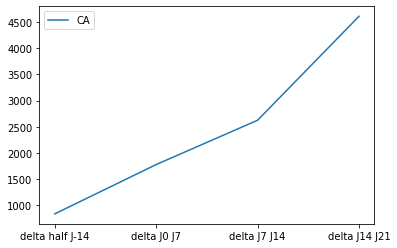

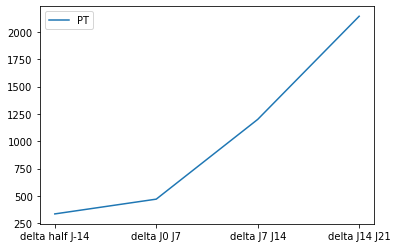

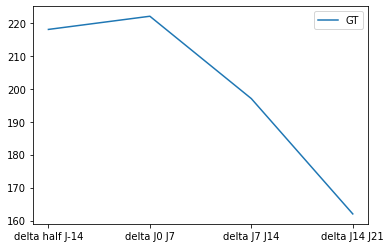

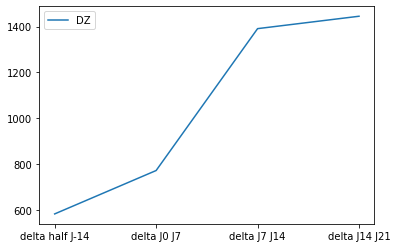

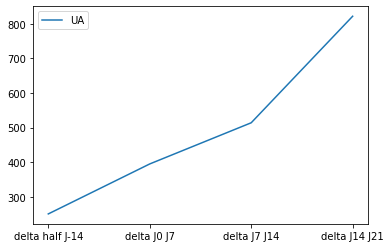

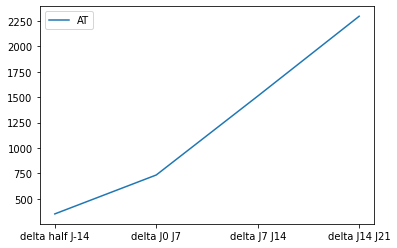

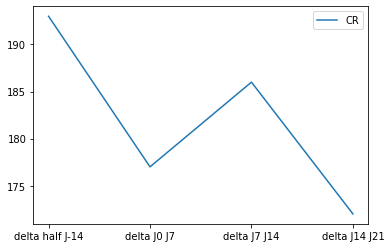

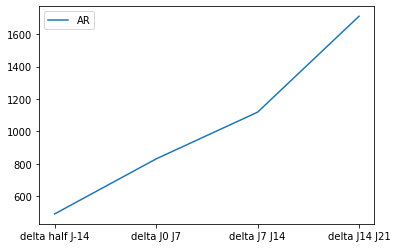

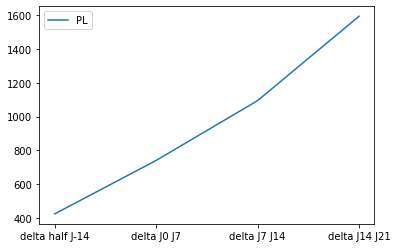

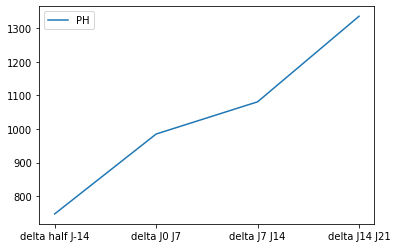

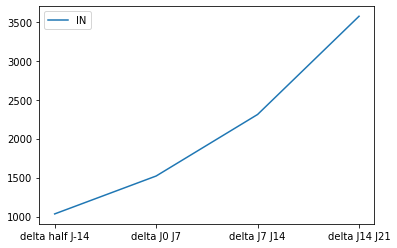

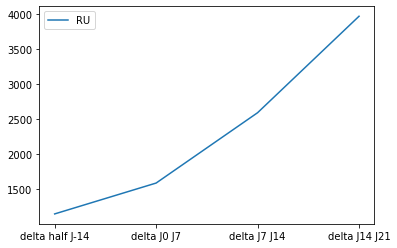

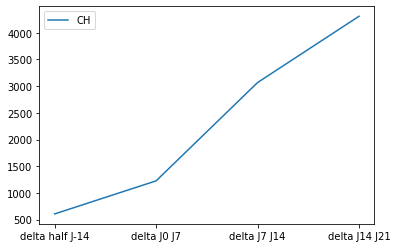

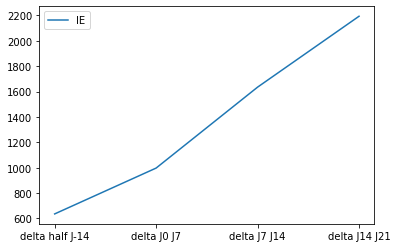

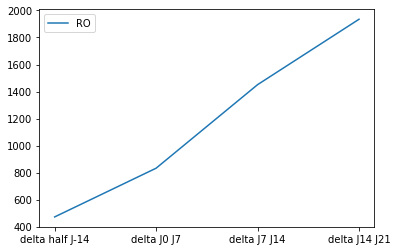

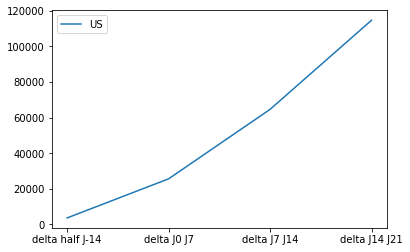

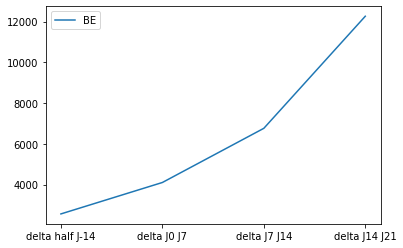

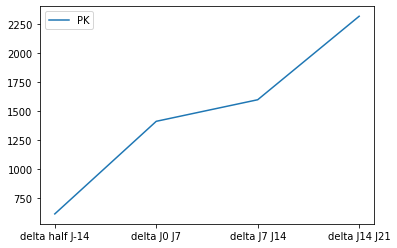

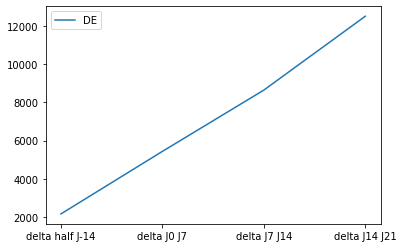

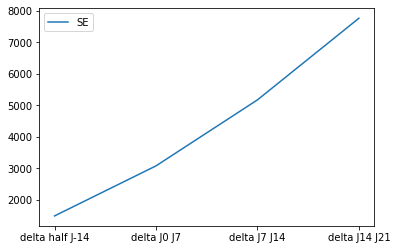

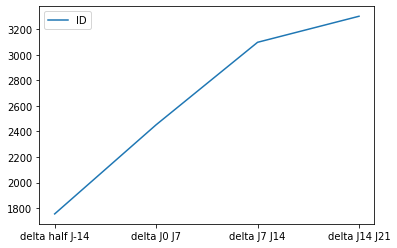

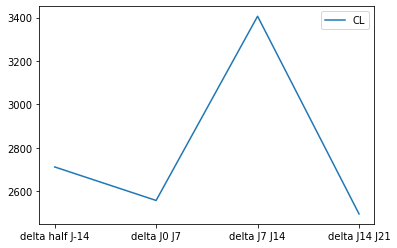

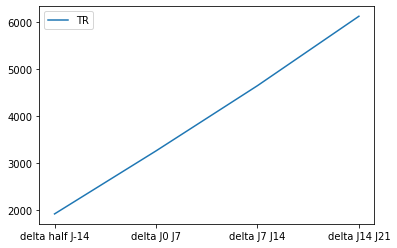

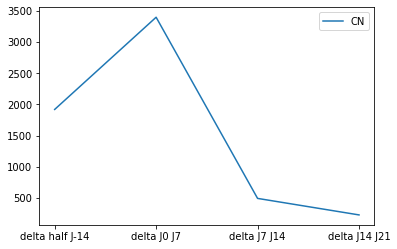

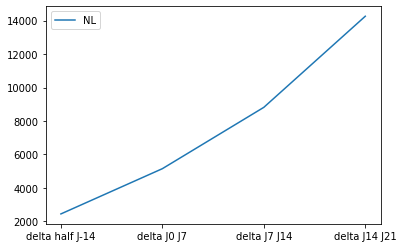

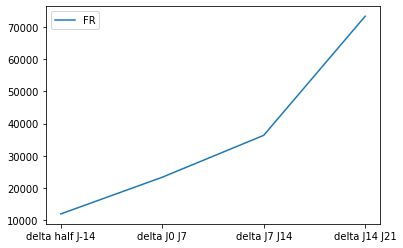

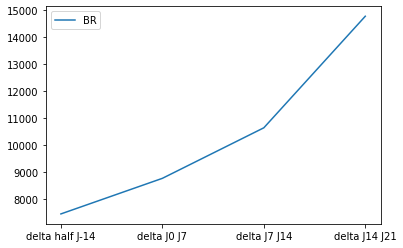

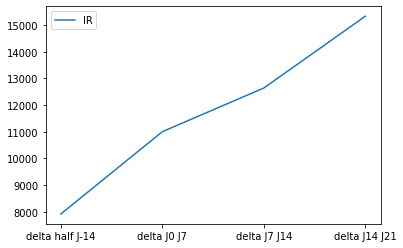

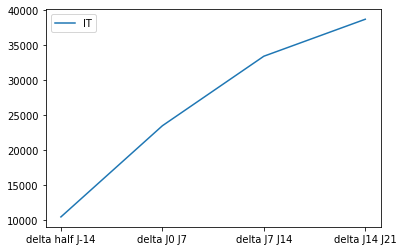

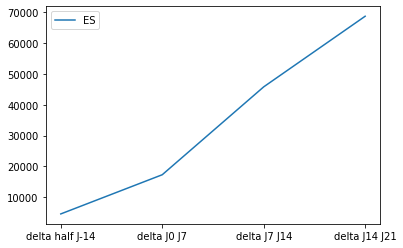

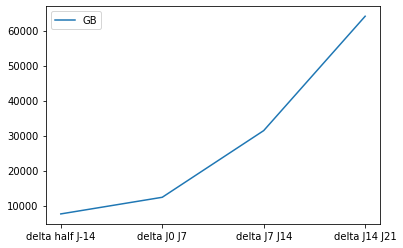

In [134]:
# plt.figure(figsize=(18,10))

import matplotlib.pyplot as plt
for i in range(160):
#     plt.figure(figsize=(18,10))
    plt.plot(test.iloc[:,i:i+1],label=test.columns[i])
    plt.legend()
    plt.show()
